# Ceny tepla 2018 ERÚ


Energetický regulační úřad pravidelně zveřejňuje [Přehled cen tepelné energie v členění podle cenových lokalit](https://www.eru.cz/teplo/statistika/prehled-cen-tepelne-energie-v-cleneni-podle-cenovych-lokalit) ve formátu pdf.

Nejnovější výsledné ceny tepla jsou za rok 2018.

In [1]:
import camelot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get pdf from the web and use Camelot to retrieve tables
tables = camelot.read_pdf('https://www.eru.cz/documents/10540/462926/Vysledne_ceny_tepla_2018.pdf', pages='1-end')
tables

<TableList n=44>

In [2]:
# Prepare header and labels
header = ['lokalita', 'kraj', 'pod_uhli', 'pod_plyn', 'pod_bio', 'pod_olej',\
          'pod_ost', 'vykon', 'pocet_odberat', 'pocet_mist', 'nad_10_czk', 'nad_10_gj',\
          'pod_10_czk','pod_10_gj','cptv_czk', 'cptv_gj',\
          'prim_rozv_czk', 'prim_rozv_gj','cvs_czk', 'cvs_gj',\
          'cvs_voda_czk', 'cvs_voda_gj','blok_kot_czk', 'blok_kot_gj',\
          'sek_rozv_czk', 'sek_rozv_gj',\
          'dps_czk', 'dps_gj', 'dom_kot_czk', 'dom_kot_gj']
podily = ['pod_uhli', 'pod_plyn', 'pod_bio', 'pod_olej', 'pod_ost']
labels = ['uhlí', 'zemní plyn', 'biomasa', 'topný olej', 'jiné']

# Merge all tables into one DataFrame
ceny = []
for i in range(tables.n):
    ceny.extend(tables[i].data[2:])
ceny = pd.DataFrame(ceny, columns=header)

# Clean strings (decimal, thousand), repair null and convert to numeric types
ceny.loc[:, 'pod_uhli':] = ceny.loc[:, 'pod_uhli':].apply(lambda x: x.str.replace(',', '.'))
ceny.loc[:, 'pod_uhli':] = ceny.loc[:, 'pod_uhli':].apply(lambda x: x.str.replace(' ', ''))
ceny.loc[:, 'pod_uhli':] = ceny.loc[:, 'pod_uhli':].apply(pd.to_numeric)
ceny.loc[:, 'pocet_odberat':'pocet_mist'] = ceny.loc[:, 'pocet_odberat':'pocet_mist'].astype('int64')
ceny = ceny.fillna(0)
ceny['lokalita'] = ceny['lokalita'].apply(lambda x: x.replace('\0', 'ti')) #There is a null value 
ceny.loc[:, 'pod_uhli':'pod_ost'] =  ceny.loc[:, 'pod_uhli':'pod_ost']/100

In [3]:
# Agregate energy and price from various supply options
gj = ceny.filter(regex='_gj+', axis=1).columns
czk = ceny.filter(regex='_czk+', axis=1).columns
ceny['dod_cena'] = np.average(ceny[czk], weights=ceny[gj], axis=1)
ceny['dod_mnozstvi'] = np.sum(ceny[gj], axis=1)

ceny.dod_mnozstvi.sum()
ceny.dod_mnozstvi.sum() == ceny.filter(regex='_gj+', axis=1).sum().sum()

True

In [4]:
ceny.to_csv('eru_ceny_tepla_2018.csv')
ceny

,lokalita,kraj,pod_uhli,pod_plyn,pod_bio,pod_olej,pod_ost,vykon,pocet_odberat,pocet_mist,...,blok_kot_czk,blok_kot_gj,sek_rozv_czk,sek_rozv_gj,dps_czk,dps_gj,dom_kot_czk,dom_kot_gj,dod_cena,dod_mnozstvi
0,Abertamy,K,0.0,1.0,0.0,0.0,0.0,0.810,2,1,...,570.27,1139.0,0.0,0.0,0.00,0.0,0.00,0.0,570.27,1764.0
1,Adamov,B,0.0,1.0,0.0,0.0,0.0,2.203,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,224.94,22964.0
2,Adamov - Opletalova 38 a 22,B,0.0,1.0,0.0,0.0,0.0,0.460,2,2,...,0.00,0.0,0.0,0.0,0.00,0.0,662.43,1382.0,662.43,1382.0
3,Adamov - P. Jilemnického 18 (K 72),B,0.0,1.0,0.0,0.0,0.0,0.090,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,324.49,514.0,324.49,514.0
4,Adamov - teplovodní zdroj,B,0.0,1.0,0.0,0.0,0.0,9.000,37,28,...,0.00,0.0,0.0,0.0,540.92,26492.0,0.00,0.0,540.92,26492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Žernůvka,B,0.0,1.0,0.0,0.0,0.0,0.300,1,2,...,0.00,0.0,0.0,0.0,0.00,0.0,465.55,1197.0,465.55,1197.0
3094,Židlochovice,B,0.0,1.0,0.0,0.0,0.0,0.863,14,30,...,0.00,0.0,0.0,0.0,0.00,0.0,511.91,3016.0,511.91,3016.0
3095,Žihle - Nový Dvůr,P,0.0,0.0,0.0,1.0,0.0,0.063,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,748.29,149.0,748.29,149.0
3096,Žinkovy,P,0.0,1.0,0.0,0.0,0.0,0.518,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,428.19,2963.0,428.19,2963.0


In [5]:
ceny.dod_cena.describe()

count    3098.000000
mean      526.822120
std       180.261807
min         0.510000
25%       415.947500
50%       519.025000
75%       633.081699
max      2102.270000
Name: dod_cena, dtype: float64

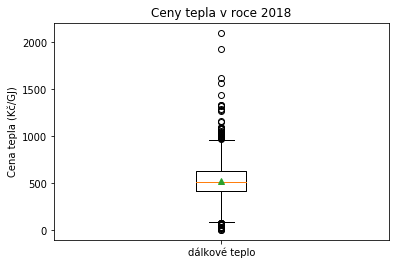

In [6]:
fig, ax = plt.subplots()
ax.boxplot(ceny.dod_cena, labels=['dálkové teplo'], showmeans=True)
ax.set_title('Ceny tepla v roce 2018')
ax.set_ylabel('Cena tepla (Kč/GJ)')
plt.show()

Orientační ceny tepla podle paliva v případě, že má dané palivo 100% podíl nebo alespoň 80% podíl. 

In [7]:
podil_100 = pd.DataFrame([ceny[ceny[podil] == 1.0]['dod_cena'] for podil in podily], index=labels)
podil_100 = podil_100.transpose()
podil_100.describe()

,uhlí,zemní plyn,biomasa,topný olej,jiné
count,58.000000,2179.00000,149.000000,37.000000,35.000000
mean,569.295494,509.74815,323.830818,776.746139,596.436000
std,153.955743,146.40789,205.753948,104.997467,497.075326
min,183.920000,69.51000,0.510000,519.970000,20.990000
25%,468.284337,413.41000,174.800000,740.480000,186.485000
50%,574.877939,497.96000,276.000000,776.890000,482.630000
75%,675.196044,597.77000,445.410000,818.230000,833.580000
max,968.010000,1934.36000,1023.230000,1023.630000,2102.270000


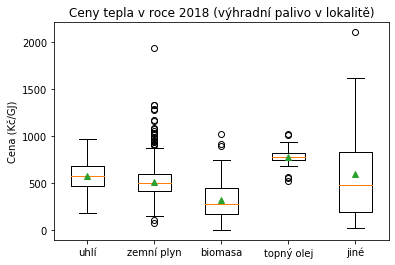

In [8]:
fig, ax = plt.subplots()
labels = ['uhlí', 'zemní plyn', 'biomasa', 'topný olej', 'jiné']
ax.set_title('Ceny tepla v roce 2018 (výhradní palivo v lokalitě)')
ax.set_ylabel('Cena (Kč/GJ)')
ax.boxplot([ceny[ceny[podil] == 1.0]['dod_cena'] for podil in podily], labels=labels, showmeans=True)
plt.show()
# fig.savefig('ceny_100pct.svg', format='svg')
# fig.savefig('ceny_100pct.png', format='png')

In [9]:
podil_80 = pd.DataFrame([ceny[ceny[podil] >= 0.8]['dod_cena'] for podil in podily], index=labels)
podil_80 = podil_80.transpose()
podil_80.describe()

,uhlí,zemní plyn,biomasa,topný olej,jiné
count,403.000000,2237.000000,181.000000,38.000000,54.000000
mean,651.882805,510.633921,346.875218,777.090136,487.078860
std,182.072178,146.185092,212.853738,103.590570,438.535837
min,177.022950,69.510000,0.510000,519.970000,20.990000
25%,537.966549,415.080000,181.500000,740.675000,178.032500
50%,660.120000,501.570000,290.000000,777.365000,340.530000
75%,774.505000,598.000000,483.280000,816.472500,678.577139
max,1444.490000,1934.360000,1023.230000,1023.630000,2102.270000


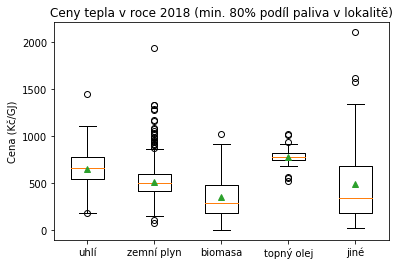

In [10]:
fig, ax = plt.subplots()
labels = ['uhlí', 'zemní plyn', 'biomasa', 'topný olej', 'jiné']
ax.set_title('Ceny tepla v roce 2018 (min. 80% podíl paliva v lokalitě)')
ax.set_ylabel('Cena (Kč/GJ)')
ax.boxplot([ceny[ceny[podil] >= 0.8]['dod_cena'] for podil in podily], labels=labels, showmeans=True)
plt.show()
# fig.savefig('ceny_80pct.svg', format='svg')
# fig.savefig('ceny_80pct.png', format='png')

In [11]:
np.sum([(ceny[podil] * ceny.dod_mnozstvi) for podil in podily])

130408958.384

In [12]:
ceny.dod_mnozstvi.sum()

130409792.0

In [13]:
ceny.filter(regex='_gj+', axis=1).sum().sum()

130409792.0